In [2]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

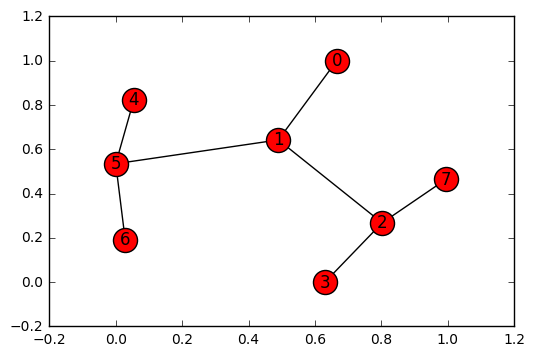

In [3]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [5]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [6]:
[(1,5)[::-1]] 
#(1,5)[0]

[(5, 1)]

In [7]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    #Gets state row from reward matrix
    current_state_row = R[state,]
    
    #Available actions that are greater than 0
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    #Randomly choose an action from available actions
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    #Gets the index of the maximum Q value - could return a matrix 
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    #If it is a matrix, randomly choose best choice and get index
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        #If not a matrix, then get index
        max_index = int(max_index)
    
    #Gets the Q value from Q matrix
    max_value = Q[action, max_index]
    
    #Update Q matrix 
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [9]:
current_state_row = R[1,]
current_state_row
av_act = np.where(current_state_row >= 0)[1]
av_act


array([0, 2, 5], dtype=int64)

In [10]:
# Training
scores = []
for i in range(800):
    #Randomly choose initial state
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:
    
    #While the agent does not get to the goal, then pick max Q value to determine next step 
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 164.0
Score: 148.780487805
max_value 0.0
Score: 148.780487805
max_value 131.2
Score: 228.780487805
max_value 0.0
Score: 228.780487805
max_value 0.0
Score: 228.780487805
max_value 104.96
Score: 292.780487805
max_value 0.0
Score: 292.780487805
max_value 0.0
Score: 292.78048

Most efficient path:
[0, 1, 2, 7]


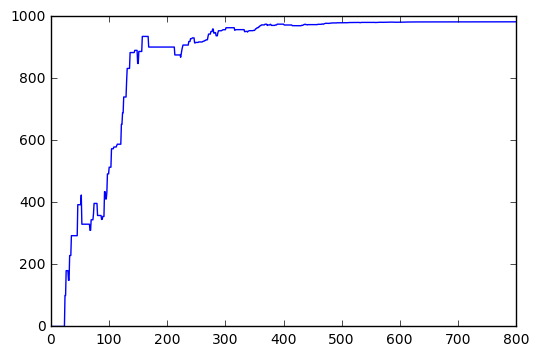

In [11]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

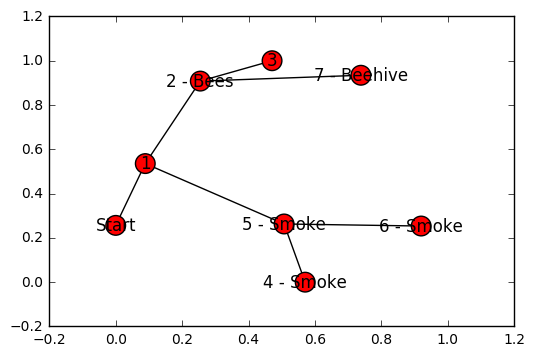

In [15]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [19]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_bees[current_state, action] += 1
  
    if 's' in environment: 
        enviro_smoke[current_state, action] += 1
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 80.0
max_value 0.0
max_value 64.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 164.0
max_value 80.0
max_value 80.0
max_value 231.2
max_value 80.0
max_value 0.0
max_value 80.0
max_value 284.96
max_value 227.968
max_value 227.968
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 227.968
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 227.968
max_value 0.0
max_value 0.0
max_value 0.0
max_value 227.968
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 227.968
max_value 0.0
max_value 0.0
max_value 227.968
max_value 0.0
max_value 0.0
max_value 182.3744
max_value 0.0
max_value 227.968
max_value 227.968
max_value 0.0
max_value 0.0
max_value 0.0
ma

max_value 0.0
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 180.0
max_value 100.0
Score: 180.0
max_value 0.0
Score: 180.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 180.0
max_value 100.0
Score: 180.0
going from: [0 2 5]
to: [0 2]
max_value 80.0
Score: 260.0
max_value 0.0
Score: 260.0
going from: [1 4 6]
to: [1]
max_value 64.0
Score: 324.0
max_value 64.0
Score: 388.0
max_value 64.0
Score: 452.0
going from: [1 4 6]
to: [1]
max_value 64.0
Score: 452.0
max_value 51.2
Score: 503.2
m

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in true_divide


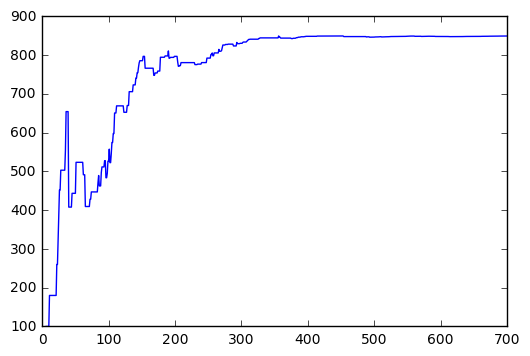

In [18]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
 

plt.plot(scores)
plt.show()